In [3]:
import pandas_datareader as pdr
import os

In [14]:
key='4158bd9816391cee3f3a5f11a0a54afe2ae91860'
df = pdr.get_data_tiingo('AAPL', api_key=key)
                                                 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [15]:
df.to_csv('AAPL')

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv('AAPL.csv')

In [18]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-08-01 00:00:00+00:00,150.05,150.22,148.4100,149.10,24725526,35.505368,35.545594,35.117306,35.280576,98902104,0.0,1.0
1,AAPL,2017-08-02 00:00:00+00:00,157.14,159.75,156.1600,159.28,69222793,37.183030,37.800617,36.951138,37.689404,276891172,0.0,1.0
2,AAPL,2017-08-03 00:00:00+00:00,155.57,157.21,155.0200,157.05,26000738,36.811530,37.199593,36.681388,37.161733,104002952,0.0,1.0
3,AAPL,2017-08-04 00:00:00+00:00,156.39,157.40,155.6900,156.07,20349532,37.005562,37.244552,36.839925,36.929842,81398128,0.0,1.0
4,AAPL,2017-08-07 00:00:00+00:00,158.81,158.92,156.6701,157.06,21870321,37.578191,37.604219,37.071840,37.164100,87481284,0.0,1.0


In [25]:
df1=df.reset_index()['close']

In [26]:
df1

0       150.05
1       157.14
2       155.57
3       156.39
4       158.81
         ...  
1253    152.95
1254    151.60
1255    156.79
1256    157.35
1257    162.51
Name: close, Length: 1258, dtype: float64

In [27]:
df1.shape

(1258,)

In [28]:
import matplotlib.pyplot as plt

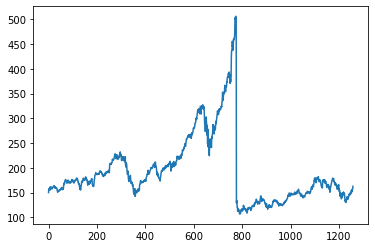

In [29]:
plt.plot(df1)

In [30]:
df1

0       150.05
1       157.14
2       155.57
3       156.39
4       158.81
         ...  
1253    152.95
1254    151.60
1255    156.79
1256    157.35
1257    162.51
Name: close, Length: 1258, dtype: float64

In [31]:
import numpy as np

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
df1

array([[0.10822793],
       [0.12598622],
       [0.12205385],
       ...,
       [0.12510958],
       [0.12651221],
       [0.13943644]])

In [57]:
df1.shape

(1258, 1)

In [58]:
print(df1)

[[0.10822793]
 [0.12598622]
 [0.12205385]
 ...
 [0.12510958]
 [0.12651221]
 [0.13943644]]


In [81]:
#splitting data set
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1):1]


In [82]:
training_size,test_size

(817, 441)

In [83]:
train_data.shape

(817, 1)

In [84]:
train_data

array([[1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],


In [89]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [90]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [91]:
print(x_train[0])
# consists of 11 feature

[0.10822793 0.12598622 0.12205385 0.1241077  0.13016907 0.13335003
 0.13580463 0.12142768 0.12683782 0.13277395 0.13715717 0.13552912
 0.12778961 0.12688791 0.12616155 0.13259862 0.13309956 0.13132123
 0.132799   0.13683156 0.14043832 0.14154039 0.14316844 0.14329368
 0.13835942 0.13793363 0.13630557 0.12971822 0.1369067  0.13530369
 0.13227301 0.12884158 0.13284909 0.12981841 0.12996869 0.1233062
 0.11659361 0.11283657 0.10948028 0.11596744 0.11869756 0.1163181
 0.11842204 0.11764559 0.11932373 0.11681904 0.12160301 0.12137758
 0.12273012 0.1228804  0.12450845 0.12313087 0.12561052 0.13284909
 0.13432686 0.13254853 0.12308078 0.12375704 0.12355667 0.12588604
 0.1241578  0.12666249 0.14078898 0.14998121 0.15579211 0.15040701
 0.15346274 0.16445836 0.16884158 0.17024421 0.17382592 0.17292423
 0.16989355 0.16814026 0.16155291 0.1558923  0.16095178 0.15857232
 0.15814652 0.16606137 0.17061991 0.17064496 0.16844083 0.16588604
 0.15689418 0.16283031 0.16082655 0.15769568 0.15729493 0.155716

In [92]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [94]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [95]:
# reshape input to be [sample,time steps,features] which is required for lstm
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
# (716,100,1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [96]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [104]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# input state is intial neuron which is x train shapeand ,1  50 is hidden neurons 
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))          
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')          

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [106]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2022-07-31 20:06:53.590132: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-31 20:06:55.337791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:55.602616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:55.882726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:56.011224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:56.204575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:56.609251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

12/12 [==============================] - ETA: 0s - loss: 0.0316

2022-07-31 20:06:59.607162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:59.698916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:59.819306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:06:59.949998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 7s 301ms/step - loss: 0.0316 - val_loss: 7.9170e-04
Epoch 2/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0164 - val_loss: 0.0055
Epoch 3/100
12/12 [==============================] - 1s 76ms/step - loss: 0.0118 - val_loss: 0.0025
Epoch 4/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0101 - val_loss: 3.9995e-04
Epoch 5/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0090 - val_loss: 3.1820e-04
Epoch 6/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0086 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 8/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0069 - val_loss: 4.9233e-04
Epoch 9/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0061 - val_loss: 4.4360e-04
Epoch 10/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0061 - val_los

12/12 [==============================] - 1s 78ms/step - loss: 0.0017 - val_loss: 2.2203e-04
Epoch 80/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 81/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 82/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0046 - val_loss: 1.8691e-04
Epoch 83/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0039 - val_loss: 1.8388e-04
Epoch 84/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0036 - val_loss: 2.7597e-04
Epoch 85/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0033 - val_loss: 2.9410e-04
Epoch 86/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0033 - val_loss: 4.2632e-04
Epoch 87/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0031 - val_loss: 2.4327e-04
Epoch 88/100
12/12 [==============================] - 1s 82ms/step - loss: 0

In [107]:
import tensorflow as tf

In [108]:
train_predict=model.predict(X_train)

2022-07-31 20:09:20.482067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:09:20.571094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:09:20.691401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 20:09:20.820283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 45ms/step


In [109]:
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 60ms/step


In [110]:
##Transformback to original form as our data is in now 3d form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [111]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.041765862372612136

In [112]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.016781617031708277

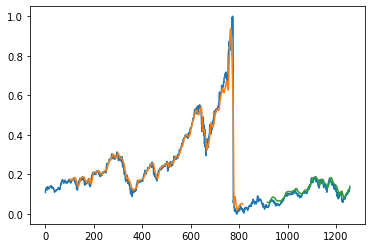

In [113]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
# orange=train predict , test=green

In [114]:
len(test_data)

441

In [135]:
x_input=test_data[341:].reshape(1,-1)
# takking previous 100 data so starting from 341 to 441

In [136]:
x_input.shape

(1, 100)

In [137]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [138]:
temp_input

[0.12673763306199123,
 0.14053850970569812,
 0.12944270507201003,
 0.11994990607388847,
 0.10965560425798374,
 0.12085159674389481,
 0.13212273011897305,
 0.1347025673137132,
 0.14311834690043826,
 0.1466249217282404,
 0.15524107701941134,
 0.15872260488415782,
 0.16839073262366935,
 0.17001878522229177,
 0.17222291797119596,
 0.18063869755792109,
 0.17765810895428932,
 0.1697432686286788,
 0.1689918597370069,
 0.17933625547902313,
 0.17087038196618656,
 0.162780212899186,
 0.16355666875391353,
 0.15842204132748902,
 0.1475516593613024,
 0.15233562930494673,
 0.15919849718221665,
 0.14639949906073887,
 0.14584846587351283,
 0.1516844082654978,
 0.15125860989355036,
 0.14922980588603627,
 0.1376330619912335,
 0.14036318096430803,
 0.12513462742642453,
 0.12455854727614271,
 0.14226675015654347,
 0.12726361928616156,
 0.1280400751408892,
 0.13184721352536002,
 0.14822792736380716,
 0.12505948653725737,
 0.12633688165309956,
 0.11326236693800876,
 0.11939887288666248,
 0.09933625547902317

In [139]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.13165173]
101
1 day input [0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651

8 day output [[0.15098208]]
9 day input [0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.

16 day output [[0.1674573]]
17 day input [0.16974327 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667
 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847
 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463
 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793
 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775
 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941
 0.09084534 0.08395742 0.08435817 0.09252348 0.107201   0.10519724
 0.10487163 0.11113338 0.096531   0.09843456 0.10487163 0.10299311
 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13165173
 0.13436495 0.13700774

24 day output [[0.18228078]]
25 day input [0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.13943644 0.13165173 0.13436495 0.13700774
 0.13953015 0.14194551 0.14428018 0.14655611 0.14878745 0.15098208
 0.15314408 0.155275

In [140]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [141]:
import matplotlib.pyplot as plt

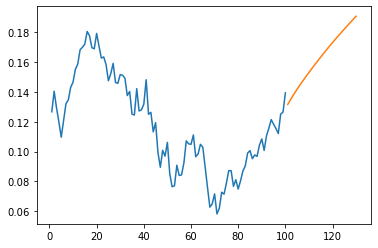

In [142]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

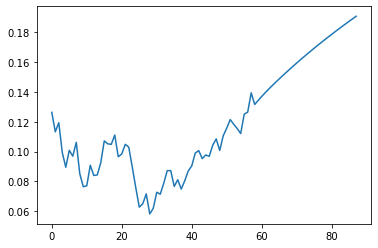

In [143]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [144]:
df3=scaler.inverse_transform(df3).tolist()

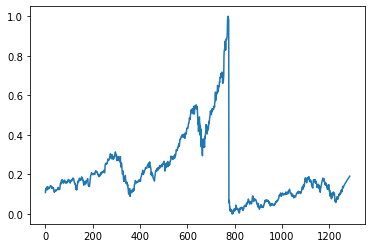

In [145]:
plt.plot(df3)